In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [16]:
car_data= pd.read_excel("Car inventory.xlsx", engine="openpyxl")
df = car_data

In [17]:
car_data

,Make,Model,Color,Mileage,Price,Cost
0,Honda,Accord,Red,63512,"$ 4,000","$ 3,000"
1,Honda,Accord,Blue,95135,"$ 2,500","$ 2,000"
2,Honda,Accord,Silver,101354,"$ 2,000","$ 1,500"
3,Toyota,Camry,Black,75006,"$ 2,198","$ 1,900"
4,Nissan,Altima,Green,69847,"$ 3,826","$ 3,000"
5,Nissan,Altima,Green,55233,"$ 2,970","$ 2,500"
6,Toyota,Corolla,Black,87278,"$ 2,224","$ 2,100"
7,Toyota,Corolla,Blue,130684,"$ 2,798","$ 2,200"
8,Toyota,Corolla,Silver,59169,"$ 2,160","$ 2,000"
9,Honda,Civic,White,138789,"$ 2,723","$ 1,900"


In [18]:
# 2. Clean and Preprocess the Dataset
# Check for missing values
print(df.isnull().sum())

Make       0
Model      0
Color      0
Mileage    0
Price      0
Cost       0
dtype: int64


In [19]:
# Remove duplicates if any
df = car_data.drop_duplicates()

In [20]:
df.dtypes

Make       object
Model      object
Color      object
Mileage     int64
Price      object
Cost       object
dtype: object

In [22]:
# Remove unwanted characters from numeric columns and convert to numbers
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
df['Cost'] = df['Cost'].replace('[\$,]', '', regex=True).astype(float)

# Verify data types
print(df.dtypes)

Make        object
Model       object
Color       object
Mileage      int64
Price      float64
Cost       float64
dtype: object


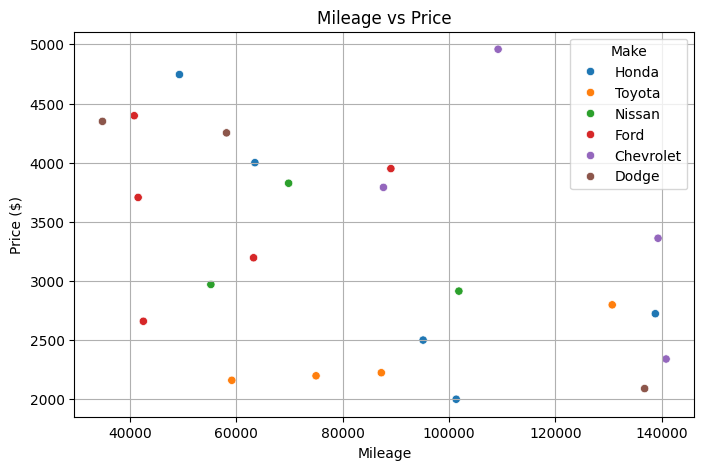

In [23]:
#4. Examine How Mileage Influences Price

# Scatter plot of Mileage vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Make', palette='tab10')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

count      24.000000
mean     3254.500000
std       914.890205
min      2000.000000
25%      2460.000000
50%      3083.000000
75%      3962.500000
max      4959.000000
Name: Price, dtype: float64


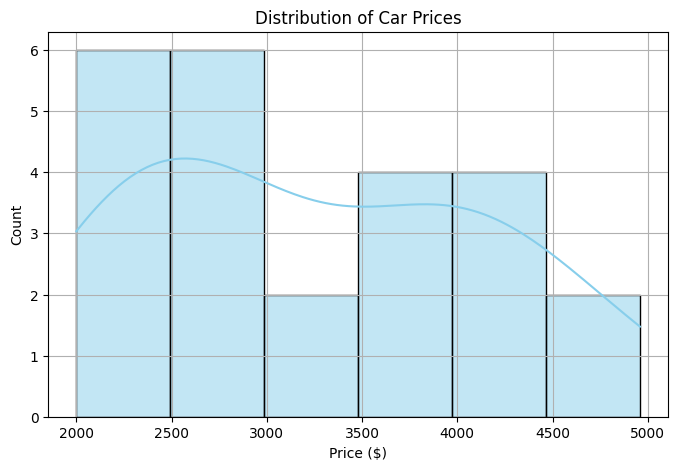

In [24]:
#3. Analyze the Distribution of Car Prices

# Summary statistics
print(df['Price'].describe())

# Histogram for price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

C:\Users\USER PC\AppData\Local\Temp\ipykernel_1280\1828942438.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Make', order=df['Make'].value_counts().index, palette='pastel')


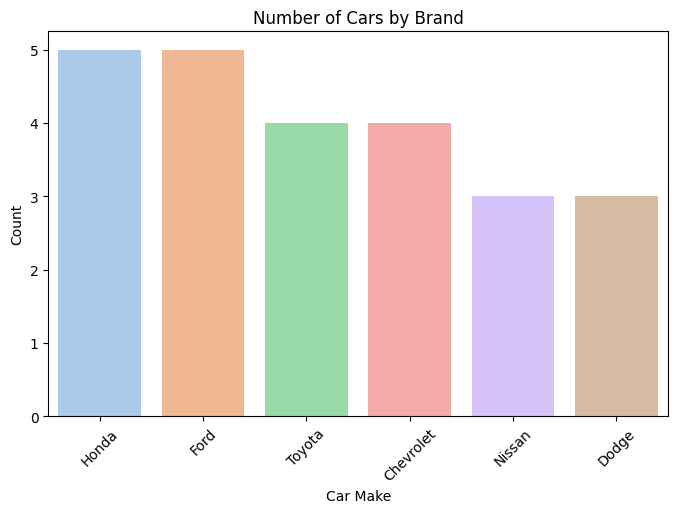

C:\Users\USER PC\AppData\Local\Temp\ipykernel_1280\1828942438.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Color', order=df['Color'].value_counts().index, palette=color_palette)


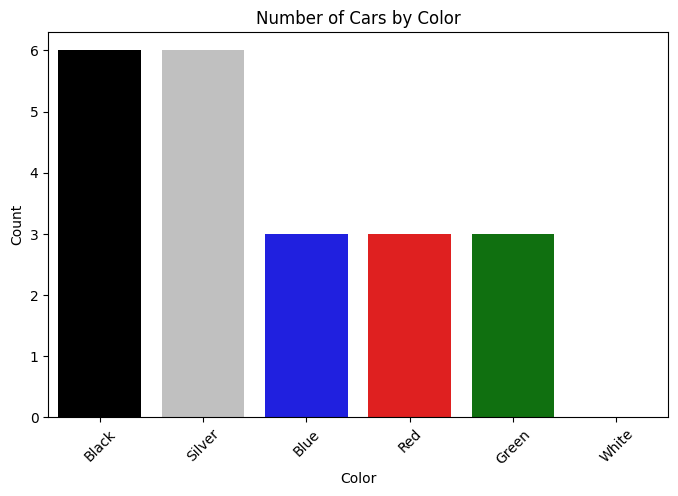

In [31]:
#5. Visualize the Number of Cars by Brand and Color

# Count of cars by Make
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Make', order=df['Make'].value_counts().index, palette='pastel')
plt.title('Number of Cars by Brand')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count of cars by Color
color_palette= {'Silver': 'silver', 'Black': 'black', 'Red': 'red', 'Blue': 'blue', 'Green': 'green', 'White': 'white'}

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Color', order=df['Color'].value_counts().index, palette=color_palette)
plt.title('Number of Cars by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Average Profit by Make:
 Make
Honda        693.600000
Nissan       570.000000
Ford         551.600000
Dodge        463.666667
Chevrolet    362.750000
Toyota       295.000000
Name: Profit, dtype: float64


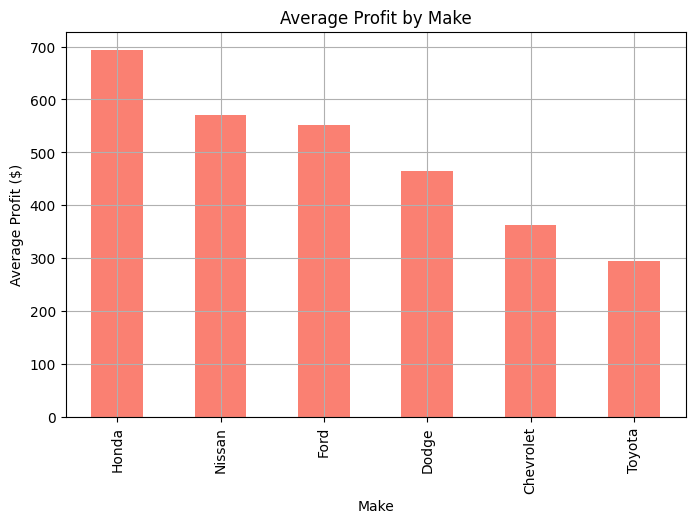

In [32]:
#6 identify important insights for Pricing and Inventory

#Add a new column for Profit
df['Profit'] = df['Price'] - df['Cost']

#Average Prices by Car Brand
avg_profit_by_make = df.groupby('Make')['Profit'].mean().sort_values(ascending=False)
print("Average Profit by Make:\n", avg_profit_by_make)

#Plot average profit by Make
plt.figure(figsize=(8,5))
avg_profit_by_make.plot(kind='bar', color='salmon')
plt.title('Average Profit by Make')
plt.xlabel('Make')
plt.ylabel('Average Profit ($)')
plt.grid(True)
plt.show()

In [33]:
#Export Cleaned Dataset (Optional)

# Save the cleaned dataset
df.to_csv('Cleaned_Car_Inventory.csv')